# Numpy 玩耍

In [1]:
import numpy as np 

In [2]:
normal_lst = range(1000)
%timeit [i**2 for i in normal_lst]

314 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
np_lst = np.arange(1000)
%timeit np_lst**2

2.34 µs ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
np_lst = np.ones(5)*3

In [5]:
normal_lst = [1,1,1,1,]*3
print(normal_lst, len(normal_lst))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 12


In [6]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [7]:
np.zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
np.ones((3,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [9]:
np.empty((2,3,3))

array([[[  6.92731267e-310,   4.64524742e-310,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   6.92730678e-310,   6.92730673e-310]],

       [[  6.92730677e-310,   6.92731169e-310,   4.64524561e-310],
        [  6.92730673e-310,   6.92730673e-310,   4.64524561e-310],
        [  4.64524561e-310,   4.64524560e-310,   3.59098502e-306]]])

In [10]:
np.ones_like(np_lst)

array([ 1.,  1.,  1.,  1.,  1.])

In [11]:
np.zeros_like(np_lst)

array([ 0.,  0.,  0.,  0.,  0.])

In [12]:
np.linspace(0,1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [13]:
stock_cnt = 200
view_days = 504
stock_day_change = np.random.standard_normal((stock_cnt,view_days))

In [14]:
print(stock_day_change.shape)

(200, 504)


In [15]:
np.around(stock_day_change[:2,:5], 2)

array([[ 0.21,  0.56, -0.59,  0.46, -1.18],
       [-0.32, -0.81,  0.72, -0.19,  1.36]])

In [16]:
tmp_test = stock_day_change[:2,:5].copy()
tmp_test[0][0] = np.nan

In [17]:
tmp_test

array([[        nan,  0.55535094, -0.59143113,  0.461341  , -1.17844119],
       [-0.31749473, -0.8119986 ,  0.71614576, -0.18895102,  1.36435956]])

In [18]:
mask = stock_day_change[:2,:5] >0.5

In [19]:
print(mask)

[[False  True False False False]
 [False False  True False  True]]


In [20]:
tmp_test = stock_day_change[-2:,-5:]
tmp_test[(tmp_test > 1) |(tmp_test < -1)]

array([ 1.8207427 , -1.04140874, -2.1304528 ])

In [21]:
np.all(stock_day_change[:2,:5]>0)

False

In [22]:
np.any(stock_day_change[:2,:5]>0)

True

In [23]:
stock_day_change.shape

(200, 504)

In [24]:
print('np1:',stock_day_change[:2,:5])
print('np2:',stock_day_change[-2:,-5:])
np.maximum(stock_day_change[:2,:5],stock_day_change[-2:,-5:])

np1: [[ 0.20977982  0.55535094 -0.59143113  0.461341   -1.17844119]
 [-0.31749473 -0.8119986   0.71614576 -0.18895102  1.36435956]]
np2: [[-0.20513479  1.8207427   0.09639429 -0.84132015  0.08703548]
 [-1.04140874  0.29608069 -2.1304528  -0.36564215 -0.50961515]]


array([[ 0.20977982,  1.8207427 ,  0.09639429,  0.461341  ,  0.08703548],
       [-0.31749473,  0.29608069,  0.71614576, -0.18895102,  1.36435956]])

In [25]:
change_int = stock_day_change[:2,:5].astype(int)
print(change_int)

[[ 0  0  0  0 -1]
 [ 0  0  0  0  1]]


In [26]:
np.diff(stock_day_change[:2,:5])

array([[ 0.34557112, -1.14678207,  1.05277213, -1.63978219],
       [-0.49450388,  1.52814436, -0.90509678,  1.55331058]])

In [27]:
np.diff(stock_day_change[:2,:5],axis=0)

array([[-0.52727454, -1.36734954,  1.30757689, -0.65029202,  2.54280075]])

In [28]:
tmp_test 

array([[-0.20513479,  1.8207427 ,  0.09639429, -0.84132015,  0.08703548],
       [-1.04140874,  0.29608069, -2.1304528 , -0.36564215, -0.50961515]])

In [29]:
np.where(tmp_test>0, 1, 0)

array([[0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0]])

In [30]:
np.where(np.logical_and(tmp_test>0.5, tmp_test<1),1,0)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [31]:
np.save('filename',tmp_test)
np.load('filename.npy')

array([[-0.20513479,  1.8207427 ,  0.09639429, -0.84132015,  0.08703548],
       [-1.04140874,  0.29608069, -2.1304528 , -0.36564215, -0.50961515]])

# 統計值

In [32]:
stock_day_change_four = stock_day_change[:4,:4]
stock_day_change_four

array([[ 0.20977982,  0.55535094, -0.59143113,  0.461341  ],
       [-0.31749473, -0.8119986 ,  0.71614576, -0.18895102],
       [-0.91541815,  0.73072165, -0.55382983,  1.19782172],
       [ 0.11300971, -1.11097564, -0.38544977,  1.56461815]])

In [33]:
print('4天內最大漲幅',np.max(stock_day_change_four,axis=1))
print('4天內最小漲幅',np.min(stock_day_change_four,axis=1))
print('4天內平均漲跌',np.mean(stock_day_change_four,axis=1))
print('4天內振幅幅度',np.max(stock_day_change_four,axis=1))

4天內最大漲幅 [ 0.55535094  0.71614576  1.19782172  1.56461815]
4天內最小漲幅 [-0.59143113 -0.8119986  -0.91541815 -1.11097564]
4天內平均漲跌 [ 0.15876016 -0.15057465  0.11482385  0.04530061]
4天內振幅幅度 [ 0.55535094  0.71614576  1.19782172  1.56461815]


In [34]:
a_investor = np.random.normal(loc=100,scale=50,size=(100,1))
b_investor = np.random.normal(loc=100,scale=20, size=(100,1))

In [35]:
a_investor.mean(),a_investor.std(),a_investor.var()

(103.32587426390961, 47.650835885371301, 2270.6021605745896)

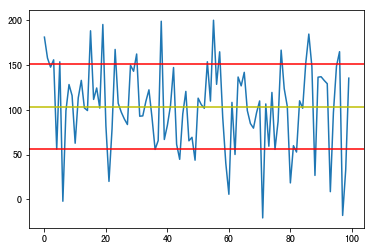

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
a_mean = a_investor.mean()
a_std = a_investor.std()
plt.plot(a_investor)
plt.axhline(a_mean + a_std, color='r')
plt.axhline(a_mean, color='y')
plt.axhline(a_mean - a_std, color='r')

# 常態分佈

In [37]:
import scipy.stats as scs

In [38]:
stock_mean = stock_day_change[0].mean()
stock_std = stock_day_change[0].std()

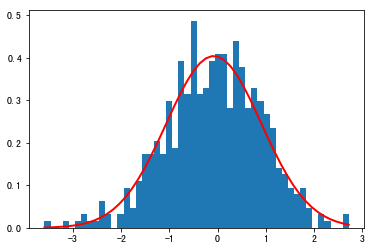

In [39]:
plt.hist(stock_day_change[0],bins=50,normed=True)
fit_linspace = np.linspace(stock_day_change[0].min(),stock_day_change[0].max())
pdf = scs.norm(stock_mean,stock_std).pdf(fit_linspace)
plt.plot(fit_linspace, pdf,lw=2,c='r')


In [40]:
stock_cnt

200

In [41]:
keep_days = 50
view_days = 504

In [42]:
stock_day_change_test = stock_day_change[:stock_cnt,
                                        0:view_days - keep_days]

In [43]:
stock_lower_array = np.argsort(np.sum(stock_day_change_test,axis=1))[:3]

In [44]:
print('max drop:{}'.format(np.sort(np.sum(stock_day_change_test,axis=1))[:3]))
print('corrs arg:{}'.format(stock_lower_array))

max drop:[-50.56136427 -47.42085934 -45.44430594]
corrs arg:[ 46   0 131]


In [45]:
def show_buy_lower(stock_ind):
    """
    """
    _, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,5))
    axs[0].plot(np.arange(0,view_days - keep_days),
              stock_day_change_test[stock_ind].cumsum())
    cs_buy = stock_day_change[stock_ind][
        view_days - keep_days:view_days].cumsum()
    axs[1].plot(np.arange(view_days - keep_days, view_days), cs_buy)
    return cs_buy[-1]

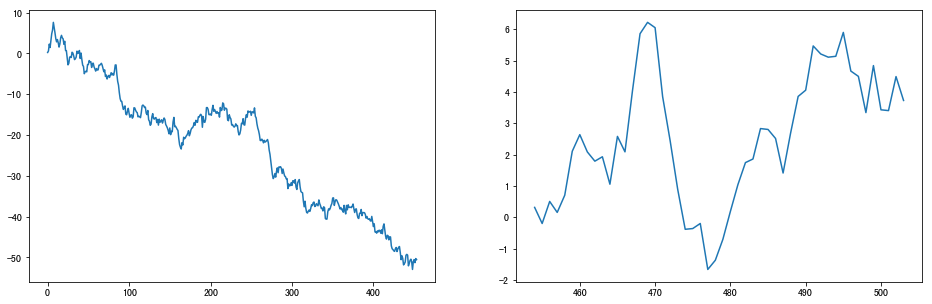

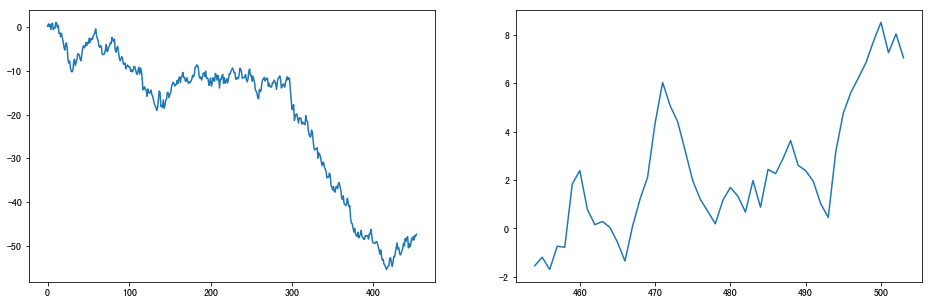

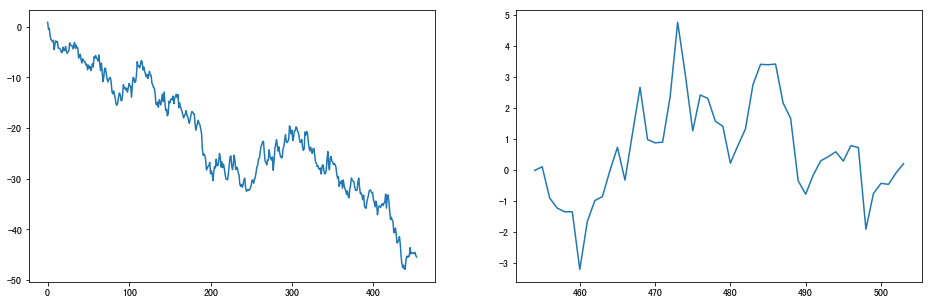

In [46]:
profit = 0
for s_ind in stock_lower_array:
    profit += show_buy_lower(s_ind)

In [47]:
profit

10.976710555324088

## Binomial

0

In [61]:
gamblers = 100
def casino(win_rate, win_once=1, loss_once=1, commission=0.01):
    """
    賭場：假設每個賭徒有100萬元,並且每個賭徒在賭場玩1000萬次..
    但是如果沒錢就無法玩了
    win_rate: 輸贏的機率
    win_once: 每次贏的金錢
    loss_once:
    commission: 手續費1%
    """
    my_money = 10000
    play_cnt = 100000
    for _ in np.arange(0,play_cnt):
        w = np.random.binomial(1, win_rate)
        if w:
            my_money += win_once
        else:
            my_money -= loss_once
        
        if my_money<0:
            break
    return my_money   

In [62]:
casino(0.5)

9696

In [63]:
## 沒有手續費的天堂賭場
heaven_moneys = [casino(0.5, commission=0) for _ in np.arange(0,gamblers)]
cheat_moneys = [casino(0.4, commission=0) for _ in np.arange(0,gamblers)]
commission_moneys = [casino(0.5, commission=0.01) for 
                     _ in np.arange(0,gamblers)]

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   2.,
          3.,   3.,   2.,   4.,   5.,   9.,   8.,   7.,  13.,   8.,  13.,
          3.,   3.,   3.,   4.,   1.,   3.,   1.,   1.]),
 array([  8858.        ,   8917.86666667,   8977.73333333,   9037.6       ,
          9097.46666667,   9157.33333333,   9217.2       ,   9277.06666667,
          9336.93333333,   9396.8       ,   9456.66666667,   9516.53333333,
          9576.4       ,   9636.26666667,   9696.13333333,   9756.        ,
          9815.86666667,   9875.73333333,   9935.6       ,   9995.46666667,
         10055.33333333,  10115.2       ,  10175.06666667,  10234.93333333,
         10294.8       ,  10354.66666667,  10414.53333333,  10474.4       ,
         10534.26666667,  10594.13333333,  10654.        ]),
 <a list of 30 Patch objects>)

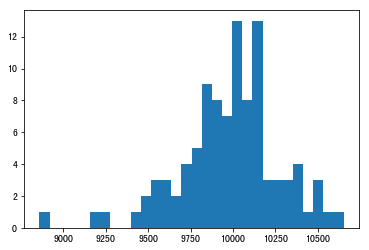

In [65]:
plt.hist(heaven_moneys, bins=30)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([-1.5       , -1.46666667, -1.43333333, -1.4       , -1.36666667,
        -1.33333333, -1.3       , -1.26666667, -1.23333333, -1.2       ,
        -1.16666667, -1.13333333, -1.1       , -1.06666667, -1.03333333,
        -1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
        -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
        -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
        -0.5       ]),
 <a list of 30 Patch objects>)

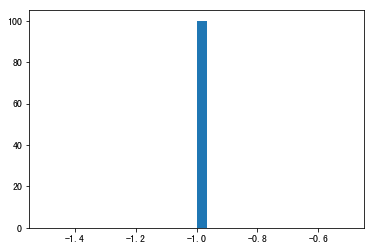

In [66]:
plt.hist(cheat_moneys, bins=30)

(array([  4.,   0.,   5.,   2.,   1.,   6.,   5.,   8.,   8.,   4.,  12.,
          7.,  11.,  10.,   3.,   3.,   3.,   1.,   1.,   3.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  9356.        ,   9419.73333333,   9483.46666667,   9547.2       ,
          9610.93333333,   9674.66666667,   9738.4       ,   9802.13333333,
          9865.86666667,   9929.6       ,   9993.33333333,  10057.06666667,
         10120.8       ,  10184.53333333,  10248.26666667,  10312.        ,
         10375.73333333,  10439.46666667,  10503.2       ,  10566.93333333,
         10630.66666667,  10694.4       ,  10758.13333333,  10821.86666667,
         10885.6       ,  10949.33333333,  11013.06666667,  11076.8       ,
         11140.53333333,  11204.26666667,  11268.        ]),
 <a list of 30 Patch objects>)

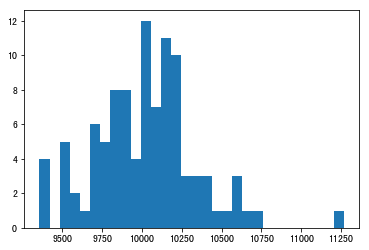

In [67]:
plt.hist(commission_moneys, bins=30)